<a href="https://colab.research.google.com/github/Shirley31415926/API_heatwave/blob/main/06%20OLS%3A%20Temperature%2C%20Post%20Volume%2C%20and%20Sentiment%20Changes%20A%20Statistical%20Investigation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<a href="https://colab.research.google.com/github/Shirley31415926/API_heatwave/blob/main/06%20Temperature%2C%20Post%20Volume%2C%20and%20Sentiment%20Changes%3A%20A%20Statistical%20Investigation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Association Between Global Temperature and Human Sentiment

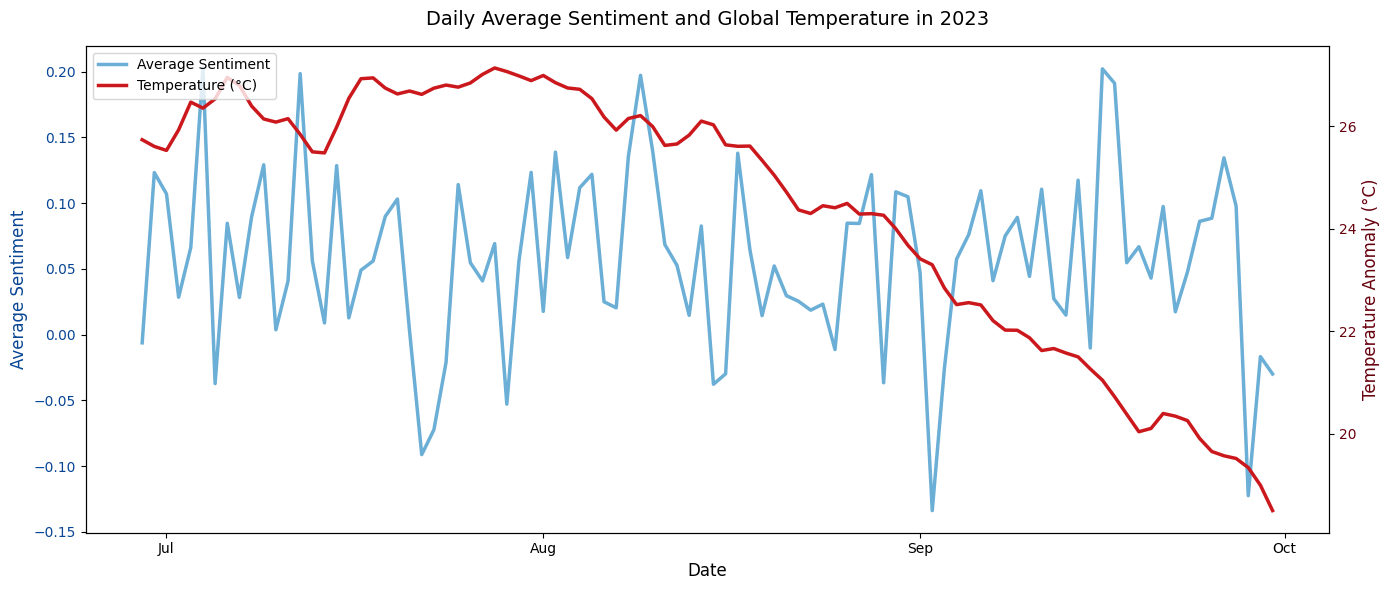

📌 Pearson Correlation (same day): 0.02
📌 Pearson Correlation (lag +1 day): 0.03

📊 Regression Summary:
                            OLS Regression Results                            
Dep. Variable:      average_sentiment   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                   0.05135
Date:                Sun, 27 Apr 2025   Prob (F-statistic):              0.821
Time:                        18:29:03   Log-Likelihood:                 121.03
No. Observations:                  94   AIC:                            -238.1
Df Residuals:                      92   BIC:                            -233.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

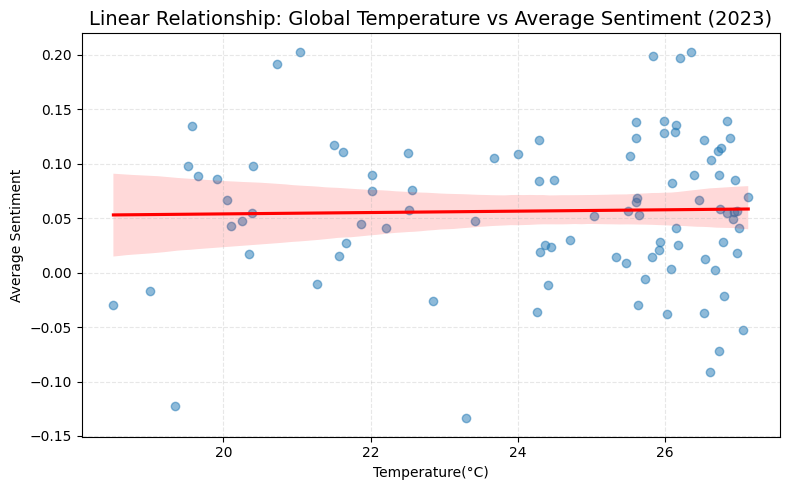

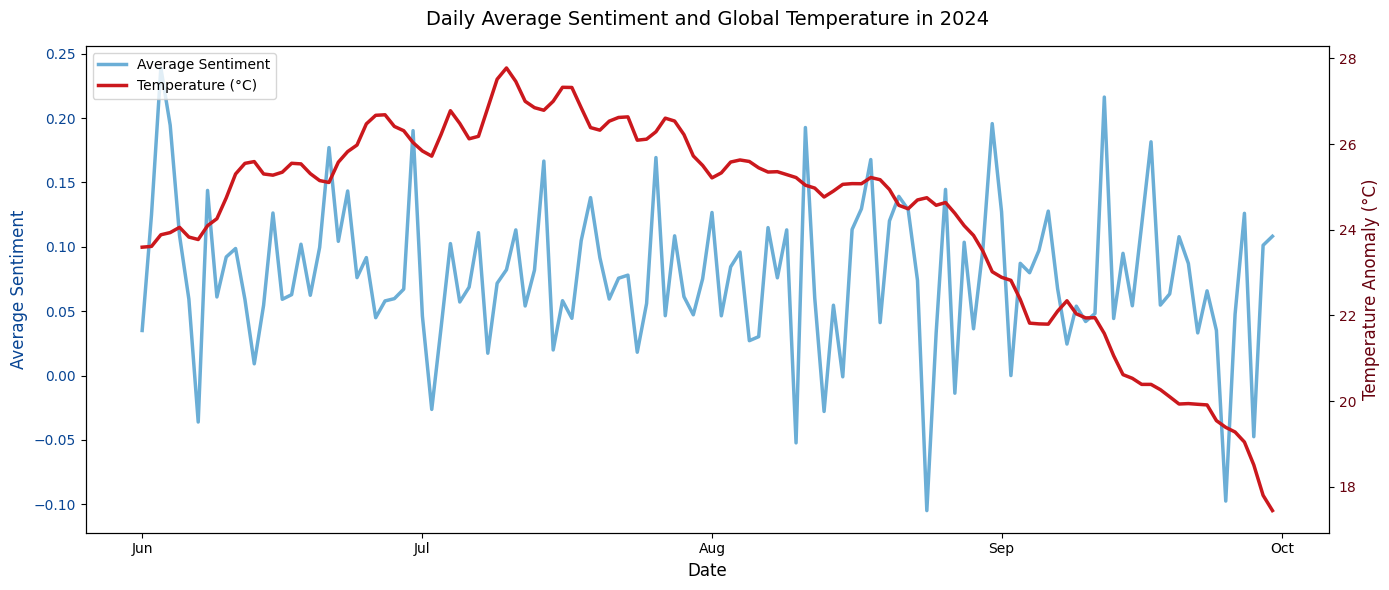

📌 Pearson Correlation (same day): 0.03
📌 Pearson Correlation (lag +1 day): 0.03

📊 Regression Summary:
                            OLS Regression Results                            
Dep. Variable:      average_sentiment   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.1255
Date:                Sun, 27 Apr 2025   Prob (F-statistic):              0.724
Time:                        18:29:04   Log-Likelihood:                 174.37
No. Observations:                 122   AIC:                            -344.7
Df Residuals:                     120   BIC:                            -339.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

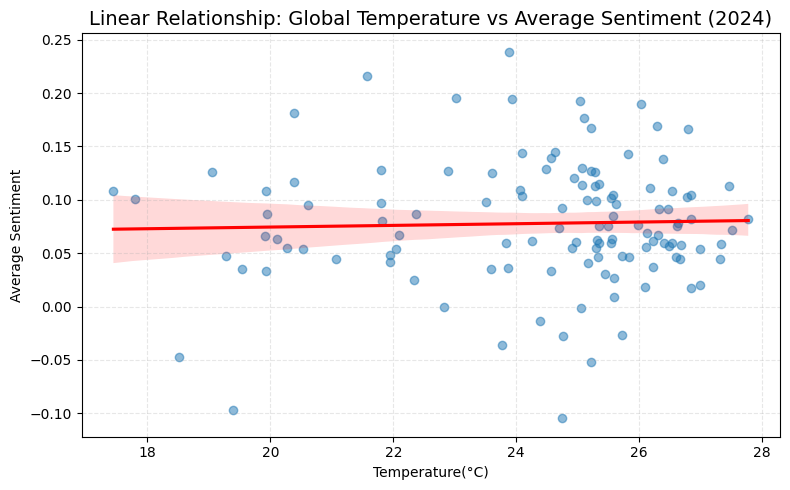

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import statsmodels.api as sm

temp_df = pd.read_csv('/content/globaltemperature2023.csv')

if '2023' in temp_df.columns:
    temp_df = temp_df.rename(columns={'2023': 'temp_anomaly'})
else:
    raise ValueError("⚠️ Cannot find the expected '2023' column in the temperature file.")

if 'Month-Day' in temp_df.columns:
    temp_df['date'] = pd.to_datetime('2023-' + temp_df['Month-Day'], format='%Y-%m-%d')
else:
    raise ValueError("⚠️ Cannot find 'Month-Day' column in the temperature file.")

temp_df = temp_df[['date', 'temp_anomaly']].dropna()
temp_df['temp_anomaly'] = pd.to_numeric(temp_df['temp_anomaly'], errors='coerce')

sentiment_df = pd.read_csv('/content/2023daily_sentiment.csv')

if 'Date' in sentiment_df.columns:
    sentiment_df['date'] = pd.to_datetime(sentiment_df['Date'])
    sentiment_df['date'] = sentiment_df['date'].dt.tz_localize(None)
else:
    raise ValueError("⚠️ Cannot find 'Date' column in the sentiment file.")

if 'Average_Sentiment' in sentiment_df.columns:
    sentiment_df['average_sentiment'] = pd.to_numeric(sentiment_df['Average_Sentiment'], errors='coerce')
else:
    raise ValueError("⚠️ Cannot find 'Average_Sentiment' column in the sentiment file.")

sentiment_daily = sentiment_df[['date', 'average_sentiment']].dropna()


merged_df = pd.merge(sentiment_daily, temp_df, on='date', how='inner').dropna()

fig, ax1 = plt.subplots(figsize=(14, 6))


ax1.plot(merged_df['date'], merged_df['average_sentiment'],
         color='#6baed6', linewidth=2.5, label='Average Sentiment')
ax1.set_ylabel('Average Sentiment', fontsize=12, color='#084594')
ax1.tick_params(axis='y', labelcolor='#084594')
ax1.set_xlabel('Date', fontsize=12)

ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.xticks(rotation=0, fontsize=10)

ax2 = ax1.twinx()
ax2.plot(merged_df['date'], merged_df['temp_anomaly'],
         color='#cb181d', linewidth=2.5, label='Temperature (°C)')
ax2.set_ylabel('Temperature Anomaly (°C)', fontsize=12, color='#67000d')
ax2.tick_params(axis='y', labelcolor='#67000d')

plt.title('Daily Average Sentiment and Global Temperature in 2023', fontsize=14, pad=15)

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
plt.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left', fontsize=10)

fig.tight_layout()
plt.show()


# Pearson correlation
corr = merged_df['temp_anomaly'].corr(merged_df['average_sentiment'])
print(f"📌 Pearson Correlation (same day): {corr:.2f}")

# Lag correlation
merged_df['average_sentiment_lag1'] = merged_df['average_sentiment'].shift(-1)
lag_corr = merged_df[['temp_anomaly', 'average_sentiment_lag1']].corr().iloc[0, 1]
print(f"📌 Pearson Correlation (lag +1 day): {lag_corr:.2f}")

# Linear regresion
X = sm.add_constant(merged_df['temp_anomaly'])
y = merged_df['average_sentiment']
model = sm.OLS(y, X).fit()

print("\n📊 Regression Summary:")
print(model.summary())


plt.figure(figsize=(8, 5))
sns.regplot(x='temp_anomaly', y='average_sentiment', data=merged_df,
            scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Linear Relationship: Global Temperature vs Average Sentiment (2023)', fontsize=14)
plt.xlabel('Temperature(°C)')
plt.ylabel('Average Sentiment')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import statsmodels.api as sm

temp_df = pd.read_csv('/content/globaltemperature2024.csv')

if '2024' in temp_df.columns:
    temp_df = temp_df.rename(columns={'2024': 'temp_anomaly'})
else:
    raise ValueError("⚠️ Cannot find the expected '2024' column in the temperature file.")

if 'Month-Day' in temp_df.columns:
    temp_df['date'] = pd.to_datetime('2024-' + temp_df['Month-Day'], format='%Y-%m-%d')
else:
    raise ValueError("⚠️ Cannot find 'Month-Day' column in the temperature file.")

temp_df = temp_df[['date', 'temp_anomaly']].dropna()
temp_df['temp_anomaly'] = pd.to_numeric(temp_df['temp_anomaly'], errors='coerce')

sentiment_df = pd.read_csv('/content/2024daily_sentiment.csv')

if 'Date' in sentiment_df.columns:
    sentiment_df['date'] = pd.to_datetime(sentiment_df['Date'])
    sentiment_df['date'] = sentiment_df['date'].dt.tz_localize(None)
else:
    raise ValueError("⚠️ Cannot find 'Date' column in the sentiment file.")

if 'Average_Sentiment' in sentiment_df.columns:
    sentiment_df['average_sentiment'] = pd.to_numeric(sentiment_df['Average_Sentiment'], errors='coerce')
else:
    raise ValueError("⚠️ Cannot find 'Average_Sentiment' column in the sentiment file.")

sentiment_daily = sentiment_df[['date', 'average_sentiment']].dropna()


merged_df = pd.merge(sentiment_daily, temp_df, on='date', how='inner').dropna()

fig, ax1 = plt.subplots(figsize=(14, 6))


ax1.plot(merged_df['date'], merged_df['average_sentiment'],
         color='#6baed6', linewidth=2.5, label='Average Sentiment')
ax1.set_ylabel('Average Sentiment', fontsize=12, color='#084594')
ax1.tick_params(axis='y', labelcolor='#084594')
ax1.set_xlabel('Date', fontsize=12)

ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.xticks(rotation=0, fontsize=10)

ax2 = ax1.twinx()
ax2.plot(merged_df['date'], merged_df['temp_anomaly'],
         color='#cb181d', linewidth=2.5, label='Temperature (°C)')
ax2.set_ylabel('Temperature Anomaly (°C)', fontsize=12, color='#67000d')
ax2.tick_params(axis='y', labelcolor='#67000d')

plt.title('Daily Average Sentiment and Global Temperature in 2024', fontsize=14, pad=15)

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
plt.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left', fontsize=10)

fig.tight_layout()
plt.show()


# Pearson correlation
corr = merged_df['temp_anomaly'].corr(merged_df['average_sentiment'])
print(f"📌 Pearson Correlation (same day): {corr:.2f}")

# Lag correlation
merged_df['average_sentiment_lag1'] = merged_df['average_sentiment'].shift(-1)
lag_corr = merged_df[['temp_anomaly', 'average_sentiment_lag1']].corr().iloc[0, 1]
print(f"📌 Pearson Correlation (lag +1 day): {lag_corr:.2f}")

# Linear regresion
X = sm.add_constant(merged_df['temp_anomaly'])
y = merged_df['average_sentiment']
model = sm.OLS(y, X).fit()

print("\n📊 Regression Summary:")
print(model.summary())


plt.figure(figsize=(8, 5))
sns.regplot(x='temp_anomaly', y='average_sentiment', data=merged_df,
            scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Linear Relationship: Global Temperature vs Average Sentiment (2024)', fontsize=14)
plt.xlabel('Temperature(°C)')
plt.ylabel('Average Sentiment')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()



# 2.How Global dewpoint temperature（Humidity）Variations Shape Collective Sentiment

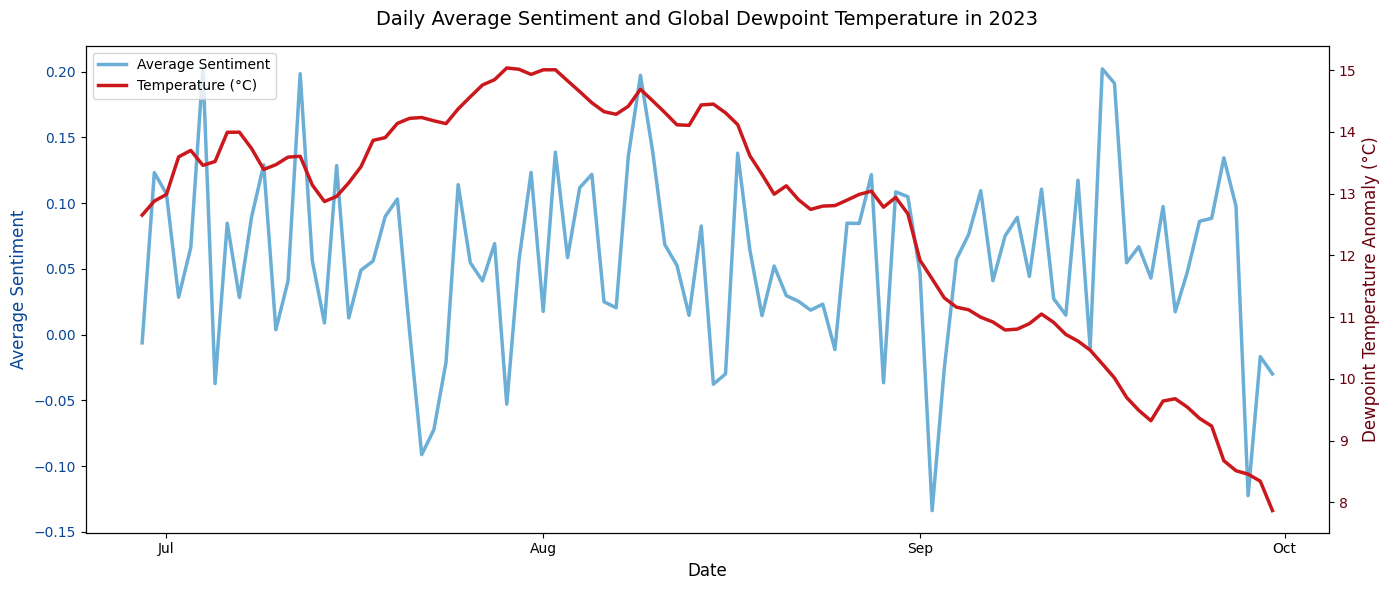

📌 Pearson Correlation (same day): 0.05
📌 Pearson Correlation (lag +1 day): 0.05

📊 Regression Summary:
                            OLS Regression Results                            
Dep. Variable:      average_sentiment   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.2281
Date:                Sun, 27 Apr 2025   Prob (F-statistic):              0.634
Time:                        18:35:48   Log-Likelihood:                 121.13
No. Observations:                  94   AIC:                            -238.3
Df Residuals:                      92   BIC:                            -233.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

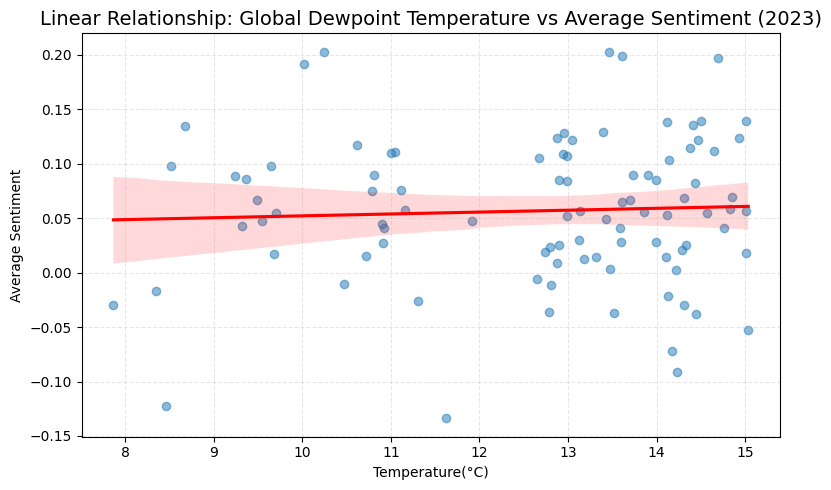

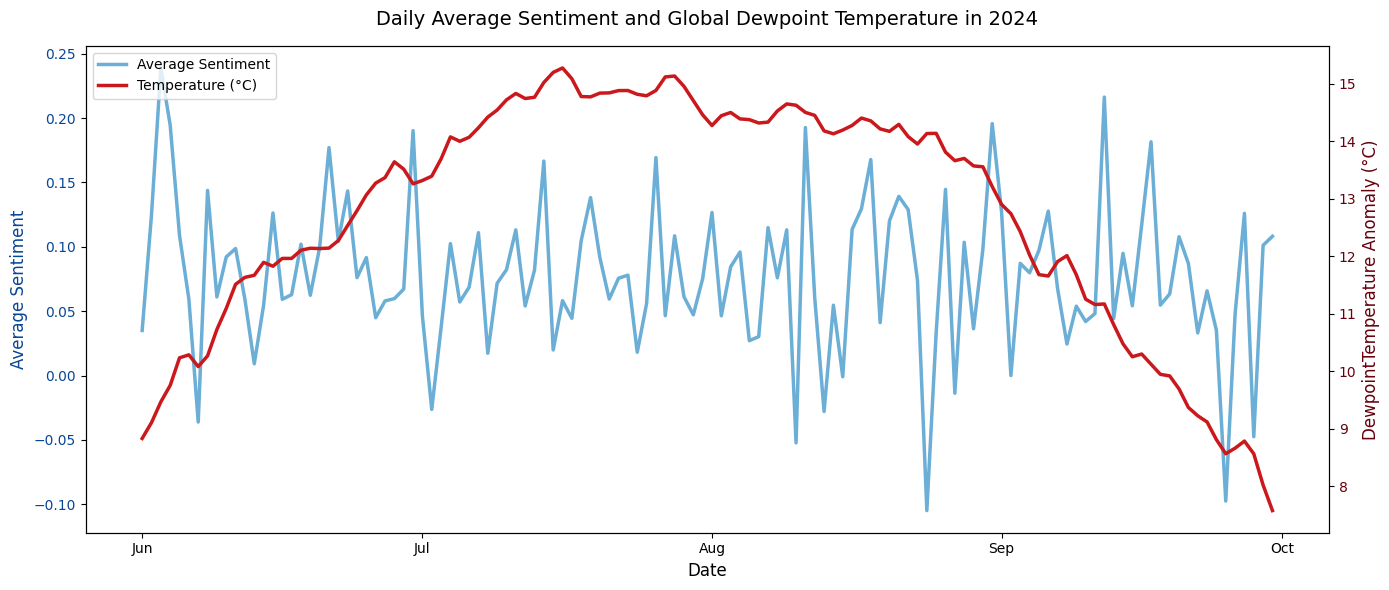

📌 Pearson Correlation (same day): -0.01
📌 Pearson Correlation (lag +1 day): -0.04

📊 Regression Summary:
                            OLS Regression Results                            
Dep. Variable:      average_sentiment   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                   0.02382
Date:                Sun, 27 Apr 2025   Prob (F-statistic):              0.878
Time:                        18:35:49   Log-Likelihood:                 174.31
No. Observations:                 122   AIC:                            -344.6
Df Residuals:                     120   BIC:                            -339.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------

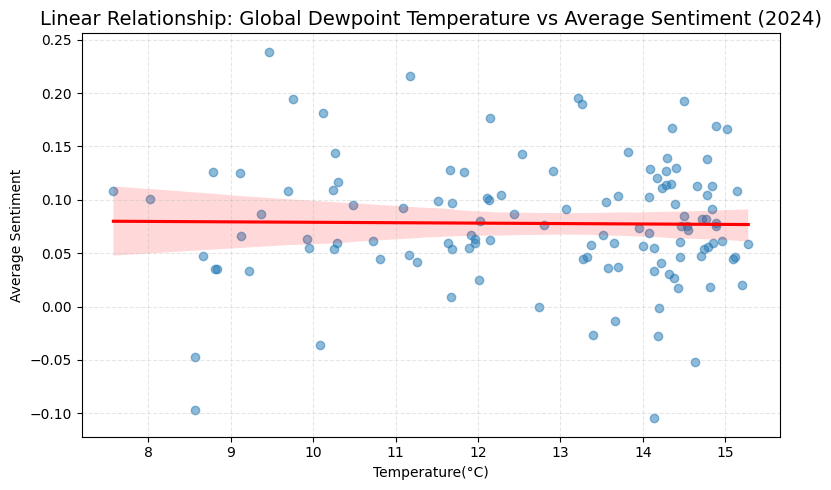

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import statsmodels.api as sm

temp_df = pd.read_csv('/content/dewpoint2023.csv')

if '2023' in temp_df.columns:
    temp_df = temp_df.rename(columns={'2023': 'temp_anomaly'})
else:
    raise ValueError("⚠️ Cannot find the expected '2023' column in the temperature file.")

if 'Month-Day' in temp_df.columns:
    temp_df['date'] = pd.to_datetime('2023-' + temp_df['Month-Day'], format='%Y-%m-%d')
else:
    raise ValueError("⚠️ Cannot find 'Month-Day' column in the temperature file.")

temp_df = temp_df[['date', 'temp_anomaly']].dropna()
temp_df['temp_anomaly'] = pd.to_numeric(temp_df['temp_anomaly'], errors='coerce')

sentiment_df = pd.read_csv('/content/2023daily_sentiment.csv')

if 'Date' in sentiment_df.columns:
    sentiment_df['date'] = pd.to_datetime(sentiment_df['Date'])
    sentiment_df['date'] = sentiment_df['date'].dt.tz_localize(None)
else:
    raise ValueError("⚠️ Cannot find 'Date' column in the sentiment file.")

if 'Average_Sentiment' in sentiment_df.columns:
    sentiment_df['average_sentiment'] = pd.to_numeric(sentiment_df['Average_Sentiment'], errors='coerce')
else:
    raise ValueError("⚠️ Cannot find 'Average_Sentiment' column in the sentiment file.")

sentiment_daily = sentiment_df[['date', 'average_sentiment']].dropna()


merged_df = pd.merge(sentiment_daily, temp_df, on='date', how='inner').dropna()

fig, ax1 = plt.subplots(figsize=(14, 6))


ax1.plot(merged_df['date'], merged_df['average_sentiment'],
         color='#6baed6', linewidth=2.5, label='Average Sentiment')
ax1.set_ylabel('Average Sentiment', fontsize=12, color='#084594')
ax1.tick_params(axis='y', labelcolor='#084594')
ax1.set_xlabel('Date', fontsize=12)

ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.xticks(rotation=0, fontsize=10)

ax2 = ax1.twinx()
ax2.plot(merged_df['date'], merged_df['temp_anomaly'],
         color='#cb181d', linewidth=2.5, label='Temperature (°C)')
ax2.set_ylabel('Dewpoint Temperature Anomaly (°C)', fontsize=12, color='#67000d')
ax2.tick_params(axis='y', labelcolor='#67000d')

plt.title('Daily Average Sentiment and Global Dewpoint Temperature in 2023', fontsize=14, pad=15)

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
plt.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left', fontsize=10)

fig.tight_layout()
plt.show()


# Pearson correlation
corr = merged_df['temp_anomaly'].corr(merged_df['average_sentiment'])
print(f"📌 Pearson Correlation (same day): {corr:.2f}")

# Lag correlation
merged_df['average_sentiment_lag1'] = merged_df['average_sentiment'].shift(-1)
lag_corr = merged_df[['temp_anomaly', 'average_sentiment_lag1']].corr().iloc[0, 1]
print(f"📌 Pearson Correlation (lag +1 day): {lag_corr:.2f}")

# Linear regresion
X = sm.add_constant(merged_df['temp_anomaly'])
y = merged_df['average_sentiment']
model = sm.OLS(y, X).fit()

print("\n📊 Regression Summary:")
print(model.summary())


plt.figure(figsize=(8, 5))
sns.regplot(x='temp_anomaly', y='average_sentiment', data=merged_df,
            scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Linear Relationship: Global Dewpoint Temperature vs Average Sentiment (2023)', fontsize=14)
plt.xlabel('Temperature(°C)')
plt.ylabel('Average Sentiment')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import statsmodels.api as sm

temp_df = pd.read_csv('/content/dewpoint2024.csv')

if '2024' in temp_df.columns:
    temp_df = temp_df.rename(columns={'2024': 'temp_anomaly'})
else:
    raise ValueError("⚠️ Cannot find the expected '2024' column in the temperature file.")

if 'Month-Day' in temp_df.columns:
    temp_df['date'] = pd.to_datetime('2024-' + temp_df['Month-Day'], format='%Y-%m-%d')
else:
    raise ValueError("⚠️ Cannot find 'Month-Day' column in the temperature file.")

temp_df = temp_df[['date', 'temp_anomaly']].dropna()
temp_df['temp_anomaly'] = pd.to_numeric(temp_df['temp_anomaly'], errors='coerce')

sentiment_df = pd.read_csv('/content/2024daily_sentiment.csv')

if 'Date' in sentiment_df.columns:
    sentiment_df['date'] = pd.to_datetime(sentiment_df['Date'])
    sentiment_df['date'] = sentiment_df['date'].dt.tz_localize(None)
else:
    raise ValueError("⚠️ Cannot find 'Date' column in the sentiment file.")

if 'Average_Sentiment' in sentiment_df.columns:
    sentiment_df['average_sentiment'] = pd.to_numeric(sentiment_df['Average_Sentiment'], errors='coerce')
else:
    raise ValueError("⚠️ Cannot find 'Average_Sentiment' column in the sentiment file.")

sentiment_daily = sentiment_df[['date', 'average_sentiment']].dropna()


merged_df = pd.merge(sentiment_daily, temp_df, on='date', how='inner').dropna()

fig, ax1 = plt.subplots(figsize=(14, 6))


ax1.plot(merged_df['date'], merged_df['average_sentiment'],
         color='#6baed6', linewidth=2.5, label='Average Sentiment')
ax1.set_ylabel('Average Sentiment', fontsize=12, color='#084594')
ax1.tick_params(axis='y', labelcolor='#084594')
ax1.set_xlabel('Date', fontsize=12)

ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.xticks(rotation=0, fontsize=10)

ax2 = ax1.twinx()
ax2.plot(merged_df['date'], merged_df['temp_anomaly'],
         color='#cb181d', linewidth=2.5, label='Temperature (°C)')
ax2.set_ylabel('DewpointTemperature Anomaly (°C)', fontsize=12, color='#67000d')
ax2.tick_params(axis='y', labelcolor='#67000d')

plt.title('Daily Average Sentiment and Global Dewpoint Temperature in 2024', fontsize=14, pad=15)

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
plt.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left', fontsize=10)

fig.tight_layout()
plt.show()


# Pearson correlation
corr = merged_df['temp_anomaly'].corr(merged_df['average_sentiment'])
print(f"📌 Pearson Correlation (same day): {corr:.2f}")

# Lag correlation
merged_df['average_sentiment_lag1'] = merged_df['average_sentiment'].shift(-1)
lag_corr = merged_df[['temp_anomaly', 'average_sentiment_lag1']].corr().iloc[0, 1]
print(f"📌 Pearson Correlation (lag +1 day): {lag_corr:.2f}")

# Linear regresion
X = sm.add_constant(merged_df['temp_anomaly'])
y = merged_df['average_sentiment']
model = sm.OLS(y, X).fit()

print("\n📊 Regression Summary:")
print(model.summary())


plt.figure(figsize=(8, 5))
sns.regplot(x='temp_anomaly', y='average_sentiment', data=merged_df,
            scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Linear Relationship: Global Dewpoint Temperature vs Average Sentiment (2024)', fontsize=14)
plt.xlabel('Temperature(°C)')
plt.ylabel('Average Sentiment')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()



# 3.Association Between UK Temperature and Human Sentiment

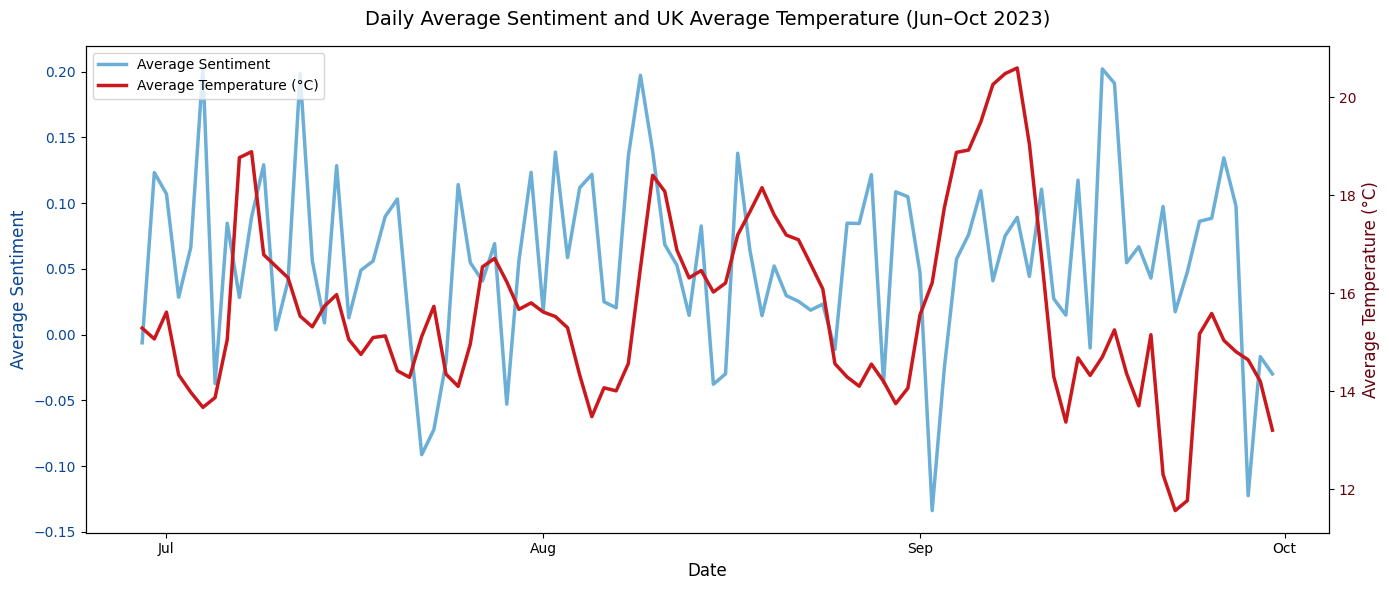

📌 Pearson Correlation (same day): 0.04
📌 Pearson Correlation (lag +1 day): 0.00

📊 Regression Summary:
                            OLS Regression Results                            
Dep. Variable:      average_sentiment   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.1314
Date:                Sun, 27 Apr 2025   Prob (F-statistic):              0.718
Time:                        18:53:33   Log-Likelihood:                 121.08
No. Observations:                  94   AIC:                            -238.2
Df Residuals:                      92   BIC:                            -233.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

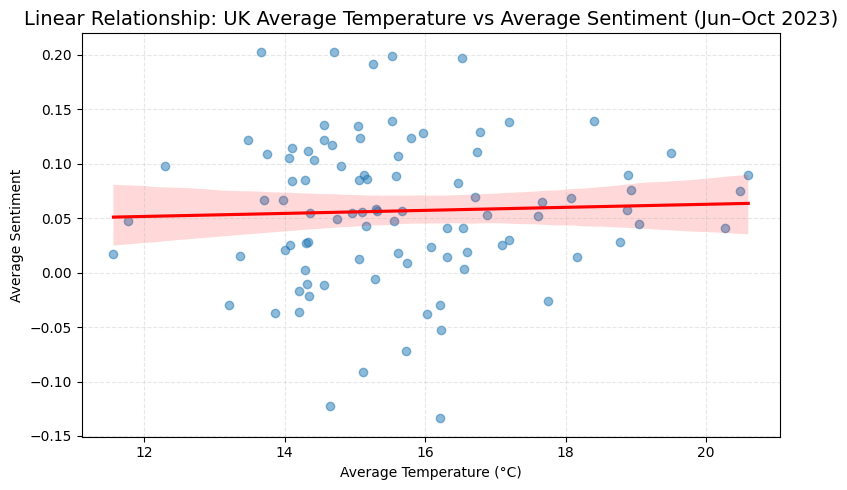

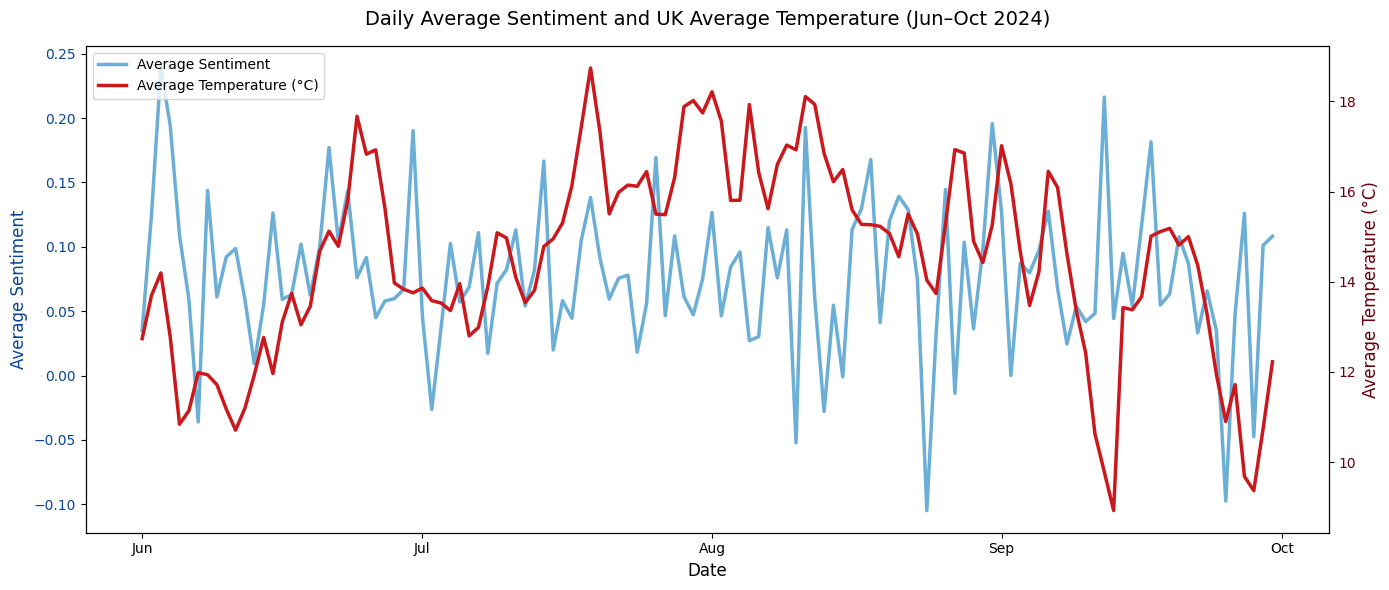

📌 Pearson Correlation (same day): 0.07
📌 Pearson Correlation (lag +1 day): -0.02

📊 Regression Summary:
                            OLS Regression Results                            
Dep. Variable:      average_sentiment   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.5104
Date:                Sun, 27 Apr 2025   Prob (F-statistic):              0.476
Time:                        18:53:34   Log-Likelihood:                 174.56
No. Observations:                 122   AIC:                            -345.1
Df Residuals:                     120   BIC:                            -339.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

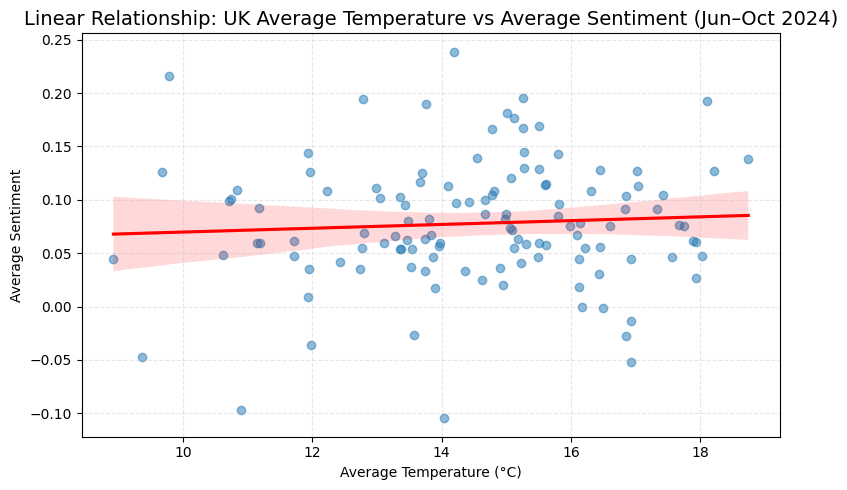

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import statsmodels.api as sm

temp_df = pd.read_csv('/content/uk_avg_temperature_2023_Jun-Oct.csv')

temp_df['date'] = pd.to_datetime(temp_df['date'])
temp_df = temp_df[['date', 'avg_temp']].dropna()

sentiment_df = pd.read_csv('/content/2023daily_sentiment.csv')

if 'Date' in sentiment_df.columns:
    sentiment_df['date'] = pd.to_datetime(sentiment_df['Date'])
    sentiment_df['date'] = sentiment_df['date'].dt.tz_localize(None)
else:
    raise ValueError("⚠️ Cannot find 'Date' column in the sentiment file.")

if 'Average_Sentiment' in sentiment_df.columns:
    sentiment_df['average_sentiment'] = pd.to_numeric(sentiment_df['Average_Sentiment'], errors='coerce')
else:
    raise ValueError("⚠️ Cannot find 'Average_Sentiment' column in the sentiment file.")

sentiment_daily = sentiment_df[['date', 'average_sentiment']].dropna()

merged_df = pd.merge(sentiment_daily, temp_df, on='date', how='inner').dropna()
fig, ax1 = plt.subplots(figsize=(14, 6))

ax1.plot(merged_df['date'], merged_df['average_sentiment'],
         color='#6baed6', linewidth=2.5, label='Average Sentiment')
ax1.set_ylabel('Average Sentiment', fontsize=12, color='#084594')
ax1.tick_params(axis='y', labelcolor='#084594')
ax1.set_xlabel('Date', fontsize=12)

ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.xticks(rotation=0, fontsize=10)

ax2 = ax1.twinx()
ax2.plot(merged_df['date'], merged_df['avg_temp'],
         color='#cb181d', linewidth=2.5, label='Average Temperature (°C)')
ax2.set_ylabel('Average Temperature (°C)', fontsize=12, color='#67000d')
ax2.tick_params(axis='y', labelcolor='#67000d')

plt.title('Daily Average Sentiment and UK Average Temperature (Jun–Oct 2023)', fontsize=14, pad=15)

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
plt.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left', fontsize=10)

fig.tight_layout()
plt.show()

# Pearson correlation
corr = merged_df['avg_temp'].corr(merged_df['average_sentiment'])
print(f"📌 Pearson Correlation (same day): {corr:.2f}")

# Lag correlate
merged_df['average_sentiment_lag1'] = merged_df['average_sentiment'].shift(-1)
lag_corr = merged_df[['avg_temp', 'average_sentiment_lag1']].corr().iloc[0, 1]
print(f"📌 Pearson Correlation (lag +1 day): {lag_corr:.2f}")

# Linear regression analysis
X = sm.add_constant(merged_df['avg_temp'])
y = merged_df['average_sentiment']
model = sm.OLS(y, X).fit()

print("\n📊 Regression Summary:")
print(model.summary())

plt.figure(figsize=(8, 5))
sns.regplot(x='avg_temp', y='average_sentiment', data=merged_df,
            scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Linear Relationship: UK Average Temperature vs Average Sentiment (Jun–Oct 2023)', fontsize=14)
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Average Sentiment')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

temp_df = pd.read_csv('/content/uk_avg_temperature_2024_Jun-Oct.csv')

temp_df['date'] = pd.to_datetime(temp_df['date'])
temp_df = temp_df[['date', 'avg_temp']].dropna()

sentiment_df = pd.read_csv('/content/2024daily_sentiment.csv')

if 'Date' in sentiment_df.columns:
    sentiment_df['date'] = pd.to_datetime(sentiment_df['Date'])
    sentiment_df['date'] = sentiment_df['date'].dt.tz_localize(None)
else:
    raise ValueError("⚠️ Cannot find 'Date' column in the sentiment file.")

if 'Average_Sentiment' in sentiment_df.columns:
    sentiment_df['average_sentiment'] = pd.to_numeric(sentiment_df['Average_Sentiment'], errors='coerce')
else:
    raise ValueError("⚠️ Cannot find 'Average_Sentiment' column in the sentiment file.")

sentiment_daily = sentiment_df[['date', 'average_sentiment']].dropna()

merged_df = pd.merge(sentiment_daily, temp_df, on='date', how='inner').dropna()
fig, ax1 = plt.subplots(figsize=(14, 6))

ax1.plot(merged_df['date'], merged_df['average_sentiment'],
         color='#6baed6', linewidth=2.5, label='Average Sentiment')
ax1.set_ylabel('Average Sentiment', fontsize=12, color='#084594')
ax1.tick_params(axis='y', labelcolor='#084594')
ax1.set_xlabel('Date', fontsize=12)

ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.xticks(rotation=0, fontsize=10)

ax2 = ax1.twinx()
ax2.plot(merged_df['date'], merged_df['avg_temp'],
         color='#cb181d', linewidth=2.5, label='Average Temperature (°C)')
ax2.set_ylabel('Average Temperature (°C)', fontsize=12, color='#67000d')
ax2.tick_params(axis='y', labelcolor='#67000d')

plt.title('Daily Average Sentiment and UK Average Temperature (Jun–Oct 2024)', fontsize=14, pad=15)

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
plt.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left', fontsize=10)

fig.tight_layout()
plt.show()

# Pearson correlation
corr = merged_df['avg_temp'].corr(merged_df['average_sentiment'])
print(f"📌 Pearson Correlation (same day): {corr:.2f}")

# Lag correlate
merged_df['average_sentiment_lag1'] = merged_df['average_sentiment'].shift(-1)
lag_corr = merged_df[['avg_temp', 'average_sentiment_lag1']].corr().iloc[0, 1]
print(f"📌 Pearson Correlation (lag +1 day): {lag_corr:.2f}")

# Linear regression analysis
X = sm.add_constant(merged_df['avg_temp'])
y = merged_df['average_sentiment']
model = sm.OLS(y, X).fit()

print("\n📊 Regression Summary:")
print(model.summary())

plt.figure(figsize=(8, 5))
sns.regplot(x='avg_temp', y='average_sentiment', data=merged_df,
            scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Linear Relationship: UK Average Temperature vs Average Sentiment (Jun–Oct 2024)', fontsize=14)
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Average Sentiment')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


# 3.1 Pearson & OLS: UK Temp Around Sentiment Lows

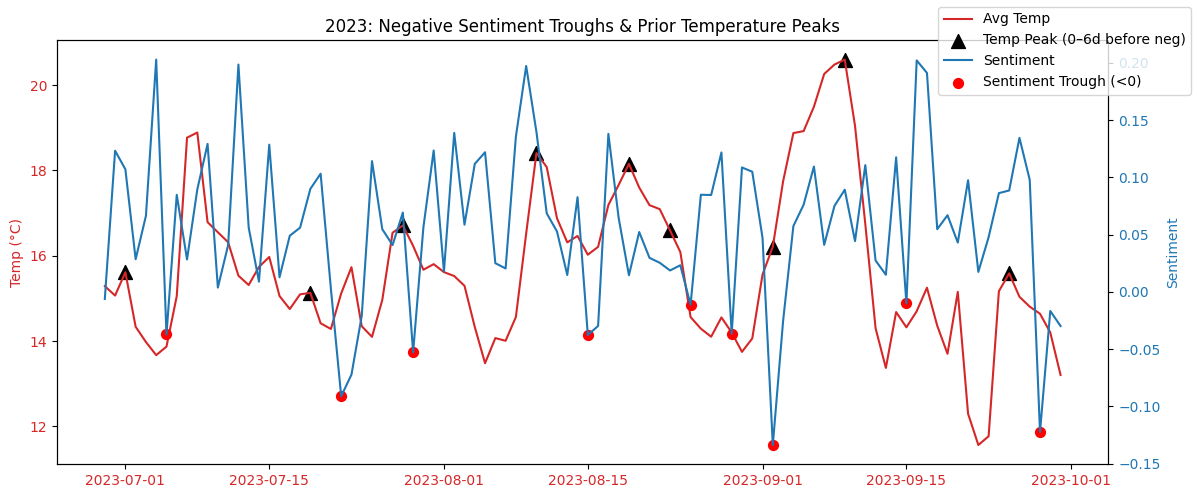

Peak vs Trough    — r=0.67, p=0.049
Peak vs LagDays  — r=0.56, p=0.118
Trough vs LagDays— r=0.78, p=0.013

                            OLS Regression Results                            
Dep. Variable:            trough_sent   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     5.635
Date:                Thu, 01 May 2025   Prob (F-statistic):             0.0493
Time:                        07:44:50   Log-Likelihood:                 18.166
No. Observations:                   9   AIC:                            -32.33
Df Residuals:                       7   BIC:                            -31.94
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=9 observations were given.
  return hypotest_fun_in(*args, **kwds)


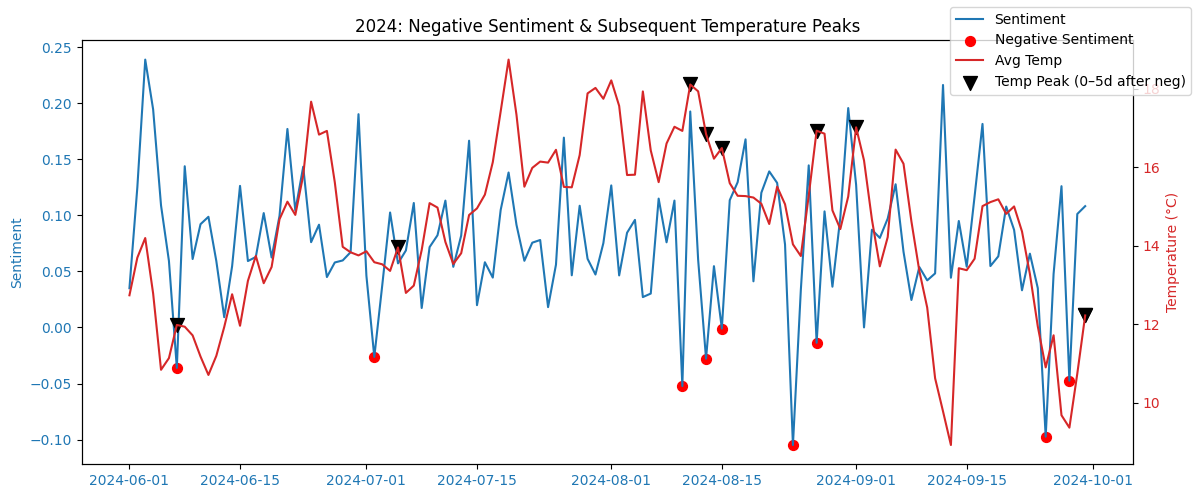

neg_sent vs peak_temp — r=0.18, p=0.636
neg_sent vs lag_days  — r=-0.41, p=0.269

OLS regression summary (peak_temp ~ neg_sent):
                            OLS Regression Results                            
Dep. Variable:              peak_temp   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                 -0.104
Method:                 Least Squares   F-statistic:                    0.2446
Date:                Thu, 01 May 2025   Prob (F-statistic):              0.636
Time:                        07:44:50   Log-Likelihood:                -20.204
No. Observations:                   9   AIC:                             44.41
Df Residuals:                       7   BIC:                             44.80
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=9 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [ ]:
import statsmodels.api as sm

def analyze_2023_with_significance(temp_file, sent_file):
    # 1) Load temperature and sentiment
    temp = pd.read_csv(temp_file, parse_dates=['date'])[['date','avg_temp']].dropna()
    sent = pd.read_csv(sent_file)
    sent['date'] = pd.to_datetime(sent['Date'], utc=True).dt.tz_localize(None)
    sent['sentiment'] = pd.to_numeric(sent['Average_Sentiment'], errors='coerce')
    sent = sent[['date','sentiment']].dropna()

    # 2) Merge on date
    df = pd.merge(temp, sent, on='date').sort_values('date').reset_index(drop=True)

    # 3) Identify local minima in sentiment
    df['is_sent_min'] = False
    minima_idx = argrelextrema(df['sentiment'].values, np.less, order=1)[0]
    df.loc[minima_idx, 'is_sent_min'] = True
    neg_minima = df.loc[minima_idx][df.loc[minima_idx, 'sentiment'] < 0]

    # 4) For each negative trough, look 0–6d back for the highest temp
    records = []
    for _, trough in neg_minima.iterrows():
        d0, s0 = trough['date'], trough['sentiment']
        window = df[(df.date >= d0 - pd.Timedelta(days=6)) & (df.date <= d0)]
        if not window.empty:
            peak_idx = window['avg_temp'].idxmax()
            records.append({
                'trough_date': d0,
                'trough_sent': s0,
                'peak_date':   df.at[peak_idx,'date'],
                'peak_temp':   df.at[peak_idx,'avg_temp'],
                'lag_days':    (d0 - df.at[peak_idx,'date']).days
            })
    result = pd.DataFrame(records)

    # 5) Plot for visual check
    fig, ax1 = plt.subplots(figsize=(12,5))
    ax1.plot(df.date, df.avg_temp, color='tab:red', label='Avg Temp')
    ax1.scatter(result.peak_date, result.peak_temp, marker='^', s=100,
                color='black', label='Temp Peak (0–6d before neg)')
    ax1.set_ylabel('Temp (°C)', color='tab:red'); ax1.tick_params(labelcolor='tab:red')

    ax2 = ax1.twinx()
    ax2.plot(df.date, df.sentiment, color='tab:blue', label='Sentiment')
    ax2.scatter(result.trough_date, result.trough_sent, color='red', s=50,
                label='Sentiment Trough (<0)')
    ax2.set_ylabel('Sentiment', color='tab:blue'); ax2.tick_params(labelcolor='tab:blue')

    plt.title('2023: Negative Sentiment Troughs & Prior Temperature Peaks')
    fig.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

    # 6) Pearson correlations with p-values
    r1, p1 = stats.pearsonr(result['peak_temp'], result['trough_sent'])
    r2, p2 = stats.pearsonr(result['peak_temp'], result['lag_days'])
    r3, p3 = stats.pearsonr(result['trough_sent'], result['lag_days'])
    print(f"Peak vs Trough    — r={r1:.2f}, p={p1:.3f}")
    print(f"Peak vs LagDays  — r={r2:.2f}, p={p2:.3f}")
    print(f"Trough vs LagDays— r={r3:.2f}, p={p3:.3f}\n")

    # 7) OLS regression of trough_sent on peak_temp
    X = sm.add_constant(result['peak_temp'])
    y = result['trough_sent']
    model = sm.OLS(y, X).fit()
    print(model.summary())

def analyze_2024_with_significance(temp_file, sent_file):
    # 1) Load temperature and sentiment
    temp = pd.read_csv(temp_file, parse_dates=['date'])[['date','avg_temp']].dropna()
    sent = pd.read_csv(sent_file)
    sent['date'] = pd.to_datetime(sent['Date'], utc=True).dt.tz_localize(None)
    sent['sentiment'] = pd.to_numeric(sent['Average_Sentiment'], errors='coerce')
    sent = sent[['date','sentiment']].dropna()

    # 2) Merge on date
    df = pd.merge(temp, sent, on='date').sort_values('date').reset_index(drop=True)

    # 3) For each negative sentiment day, find the max temp in the following 0–5 days
    records = []
    for _, row in df[df['sentiment'] < 0].iterrows():
        d0, s0 = row['date'], row['sentiment']
        window = df[(df.date >= d0) & (df.date <= d0 + pd.Timedelta(days=5))]
        if not window.empty:
            idx = window['avg_temp'].idxmax()
            records.append({
                'neg_date':  d0,
                'neg_sent':  s0,
                'peak_date': df.at[idx,'date'],
                'peak_temp': df.at[idx,'avg_temp'],
                'lag_days':  (df.at[idx,'date'] - d0).days
            })
    result = pd.DataFrame(records)

    # 4) Plot
    fig, ax1 = plt.subplots(figsize=(12,5))
    ax1.plot(df.date, df.sentiment, color='tab:blue', label='Sentiment')
    ax1.scatter(result.neg_date, result.neg_sent, color='red', s=50, label='Negative Sentiment')
    ax1.set_ylabel('Sentiment', color='tab:blue'); ax1.tick_params(labelcolor='tab:blue')

    ax2 = ax1.twinx()
    ax2.plot(df.date, df.avg_temp, color='tab:red', label='Avg Temp')
    ax2.scatter(result.peak_date, result.peak_temp, marker='v', s=100,
                color='black', label='Temp Peak (0–5d after neg)')
    ax2.set_ylabel('Temperature (°C)', color='tab:red'); ax2.tick_params(labelcolor='tab:red')

    plt.title('2024: Negative Sentiment & Subsequent Temperature Peaks')
    fig.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

    # 5) Pearson correlations + p-values
    r1, p1 = stats.pearsonr(result['neg_sent'], result['peak_temp'])
    r2, p2 = stats.pearsonr(result['neg_sent'], result['lag_days'])
    print(f"neg_sent vs peak_temp — r={r1:.2f}, p={p1:.3f}")
    print(f"neg_sent vs lag_days  — r={r2:.2f}, p={p2:.3f}\n")

    # 6) OLS regression: peak_temp ~ neg_sent
    X = sm.add_constant(result['neg_sent'])
    y = result['peak_temp']
    model = sm.OLS(y, X).fit()
    print("OLS regression summary (peak_temp ~ neg_sent):")
    print(model.summary())

analyze_2023_with_significance(
    '/content/drive/MyDrive/API temp data/0401 R studio 跑的美国欧洲还有单独英国的data/uk_avg_temperature_2023_Jun-Oct.csv',
    '/content/drive/MyDrive/API temp data/05 统计学/2023daily_sentiment.csv'
)
analyze_2024_with_significance(
    '/content/drive/MyDrive/API temp data/0401 R studio 跑的美国欧洲还有单独英国的data/uk_avg_temperature_2024_Jun-Oct.csv',
    '/content/drive/MyDrive/API temp data/05 统计学/2024daily_sentiment.csv'
)

# 4. Temporal Dynamics of Post Count and Sentiment Fluctuations

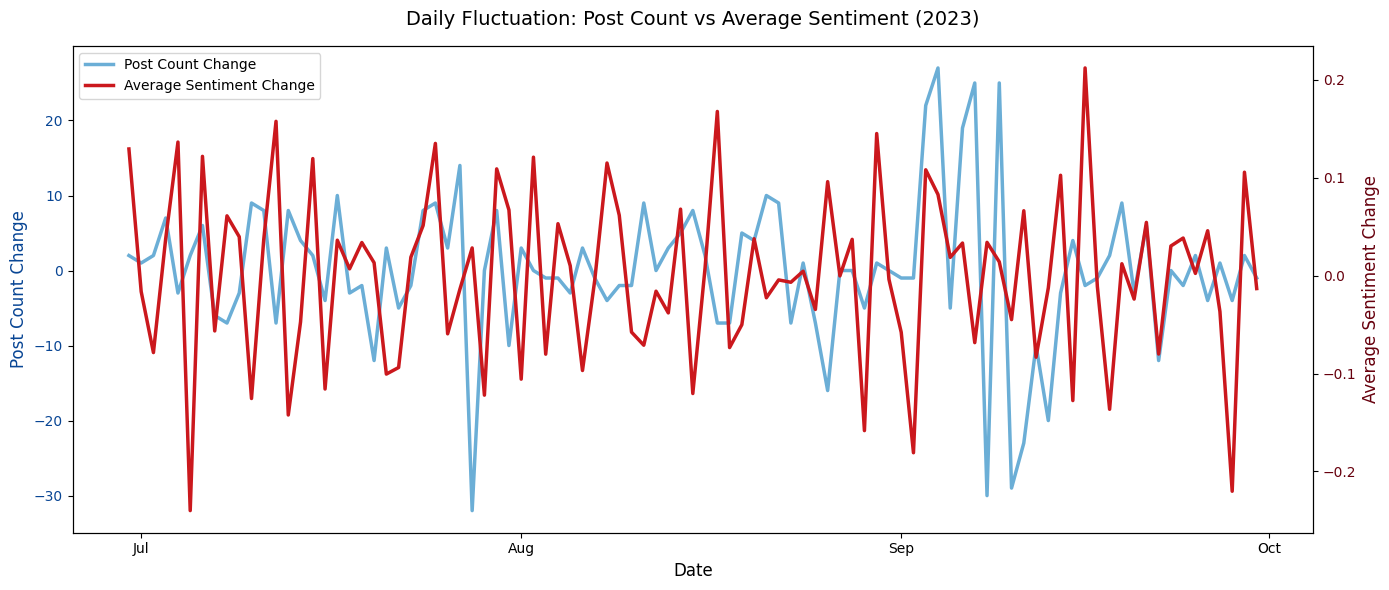

📌 Pearson Correlation (change same day): -0.01
📌 Pearson Correlation (change lag +1 day): 0.10

📊 Regression Summary (Change Variables):
                             OLS Regression Results                             
Dep. Variable:     avg_sentiment_change   R-squared:                       0.000
Model:                              OLS   Adj. R-squared:                 -0.011
Method:                   Least Squares   F-statistic:                   0.01090
Date:                  Sun, 27 Apr 2025   Prob (F-statistic):              0.917
Time:                          19:05:25   Log-Likelihood:                 93.811
No. Observations:                    93   AIC:                            -183.6
Df Residuals:                        91   BIC:                            -178.6
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                        coef    std err          t   

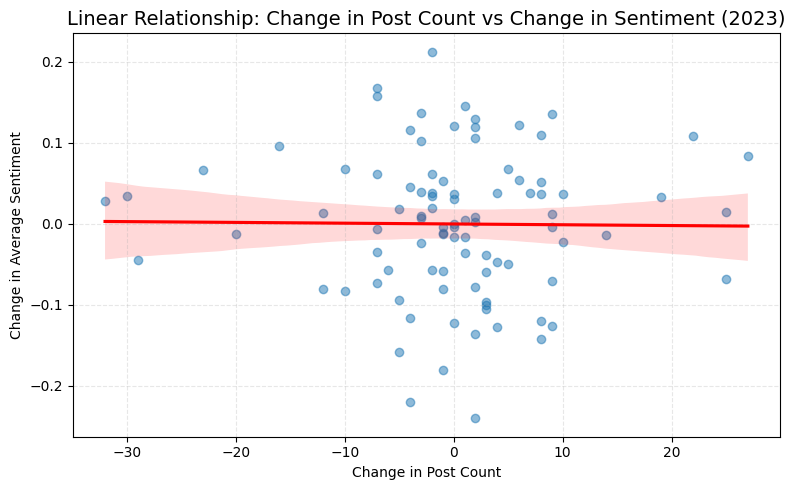

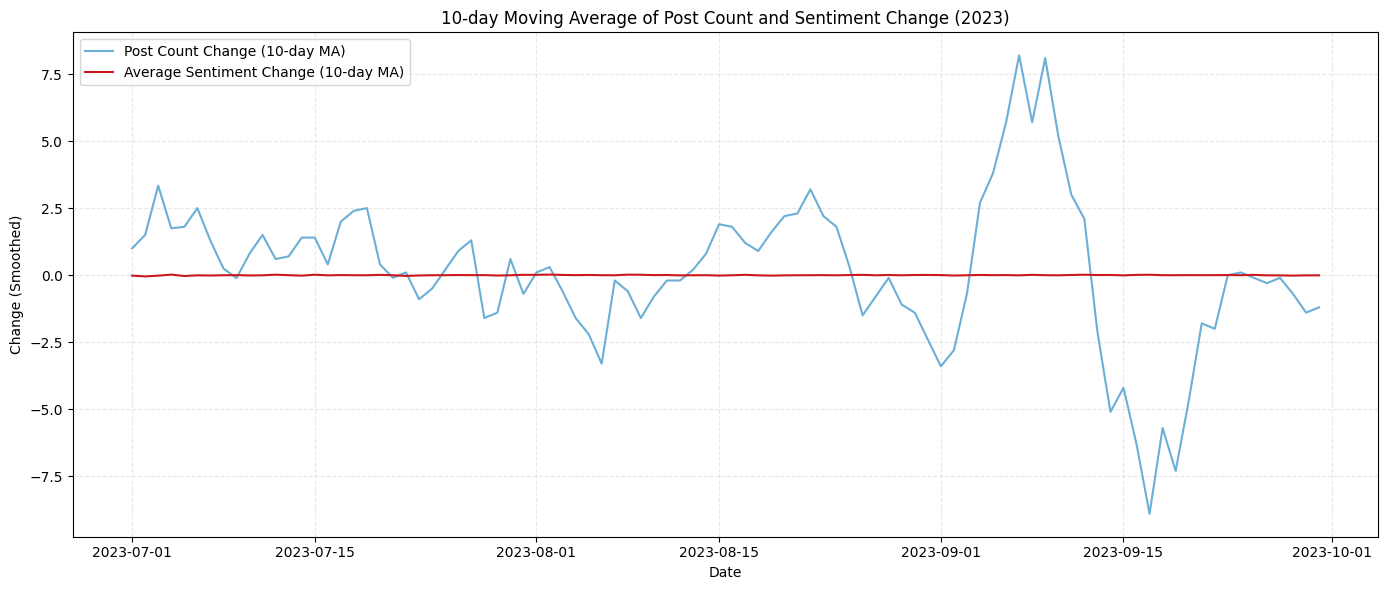

📌 Pearson Correlation (10-day moving average): -0.15
📌 Pearson Correlation (lag +1 day, 10-day moving average): -0.00

📊 Regression Summary (10-day moving average):
                               OLS Regression Results                               
Dep. Variable:     avg_sentiment_change_10d   R-squared:                       0.023
Model:                                  OLS   Adj. R-squared:                  0.012
Method:                       Least Squares   F-statistic:                     2.122
Date:                      Sun, 27 Apr 2025   Prob (F-statistic):              0.149
Time:                              19:05:26   Log-Likelihood:                 283.49
No. Observations:                        92   AIC:                            -563.0
Df Residuals:                            90   BIC:                            -557.9
Df Model:                                 1                                         
Covariance Type:                  nonrobust                           

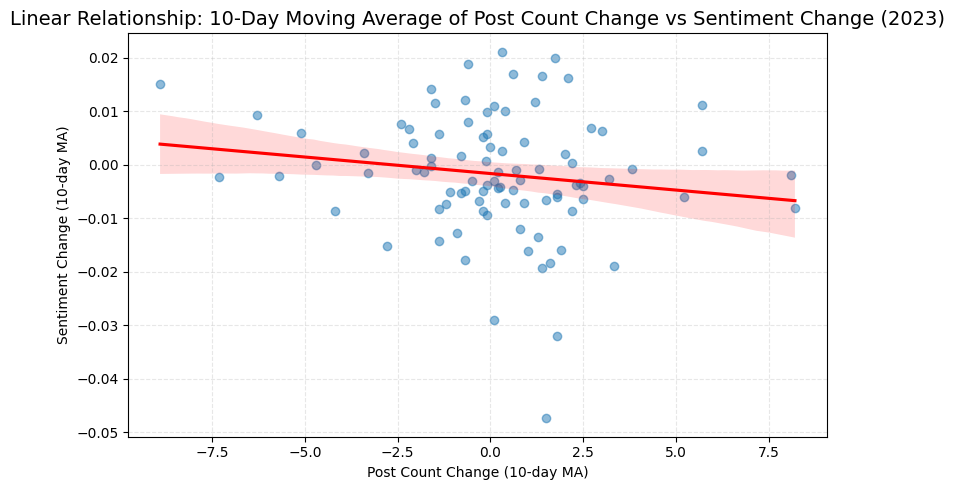

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import statsmodels.api as sm

posts_df = pd.read_json('/content/heat_posts2023.jsonl', lines=True)

if 'created_at' not in posts_df.columns:
    raise ValueError("⚠️ Missing 'created_at' column in posts file.")

posts_df['date'] = pd.to_datetime(posts_df['created_at']).dt.date
posts_daily = posts_df.groupby('date').size().reset_index(name='post_count')
posts_daily['date'] = pd.to_datetime(posts_daily['date'])

sentiment_df = pd.read_csv('/content/2023daily_sentiment.csv')

if 'Date' in sentiment_df.columns:
    sentiment_df['date'] = pd.to_datetime(sentiment_df['Date'])
    sentiment_df['date'] = sentiment_df['date'].dt.tz_localize(None)
else:
    raise ValueError("⚠️ Cannot find 'Date' column in the sentiment file.")

if 'Average_Sentiment' in sentiment_df.columns:
    sentiment_df['average_sentiment'] = pd.to_numeric(sentiment_df['Average_Sentiment'], errors='coerce')
else:
    raise ValueError("⚠️ Cannot find 'Average_Sentiment' column in the sentiment file.")

sentiment_daily = sentiment_df[['date', 'average_sentiment']].dropna()

merged_df = pd.merge(posts_daily, sentiment_daily, on='date', how='inner').dropna()
merged_df['post_count_change'] = merged_df['post_count'].diff()
merged_df['avg_sentiment_change'] = merged_df['average_sentiment'].diff()
merged_df = merged_df.dropna()

fig, ax1 = plt.subplots(figsize=(14, 6))

ax1.plot(merged_df['date'], merged_df['post_count_change'],
         color='#6baed6', linewidth=2.5, label='Post Count Change')
ax1.set_ylabel('Post Count Change', fontsize=12, color='#084594')
ax1.tick_params(axis='y', labelcolor='#084594')
ax1.set_xlabel('Date', fontsize=12)

ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.xticks(rotation=0, fontsize=10)

ax2 = ax1.twinx()
ax2.plot(merged_df['date'], merged_df['avg_sentiment_change'],
         color='#cb181d', linewidth=2.5, label='Average Sentiment Change')
ax2.set_ylabel('Average Sentiment Change', fontsize=12, color='#67000d')
ax2.tick_params(axis='y', labelcolor='#67000d')

plt.title('Daily Fluctuation: Post Count vs Average Sentiment (2023)', fontsize=14, pad=15)
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
plt.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left', fontsize=10)
fig.tight_layout()
plt.show()

corr = merged_df['post_count_change'].corr(merged_df['avg_sentiment_change'])
print(f"📌 Pearson Correlation (change same day): {corr:.2f}")

merged_df['avg_sentiment_change_lag1'] = merged_df['avg_sentiment_change'].shift(-1)
lag_corr = merged_df[['post_count_change', 'avg_sentiment_change_lag1']].corr().iloc[0, 1]
print(f"📌 Pearson Correlation (change lag +1 day): {lag_corr:.2f}")

X = sm.add_constant(merged_df['post_count_change'])
y = merged_df['avg_sentiment_change']
model = sm.OLS(y, X).fit()

print("\n📊 Regression Summary (Change Variables):")
print(model.summary())

plt.figure(figsize=(8, 5))
sns.regplot(x='post_count_change', y='avg_sentiment_change', data=merged_df,
            scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Linear Relationship: Change in Post Count vs Change in Sentiment (2023)', fontsize=14)
plt.xlabel('Change in Post Count')
plt.ylabel('Change in Average Sentiment')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

#rolling mean

merged_df['post_count_change'] = merged_df['post_count'].diff()
merged_df['avg_sentiment_change'] = merged_df['average_sentiment'].diff()

merged_df['post_count_change_10d'] = merged_df['post_count_change'].rolling(window=10, min_periods=1).mean()
merged_df['avg_sentiment_change_10d'] = merged_df['avg_sentiment_change'].rolling(window=10, min_periods=1).mean()
merged_df = merged_df.dropna(subset=['post_count_change_10d', 'avg_sentiment_change_10d'])

fig, ax = plt.subplots(figsize=(14, 6))
sns.lineplot(data=merged_df, x='date', y='post_count_change_10d', label='Post Count Change (10-day MA)', color='#6baed6')
sns.lineplot(data=merged_df, x='date', y='avg_sentiment_change_10d', label='Average Sentiment Change (10-day MA)', color='#cb181d')
plt.title('10-day Moving Average of Post Count and Sentiment Change (2023)')
plt.xlabel('Date')
plt.ylabel('Change (Smoothed)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

corr = merged_df['post_count_change_10d'].corr(merged_df['avg_sentiment_change_10d'])
print(f"📌 Pearson Correlation (10-day moving average): {corr:.2f}")

merged_df['avg_sentiment_change_10d_lag1'] = merged_df['avg_sentiment_change_10d'].shift(-1)
lag_corr = merged_df[['post_count_change_10d', 'avg_sentiment_change_10d_lag1']].corr().iloc[0, 1]
print(f"📌 Pearson Correlation (lag +1 day, 10-day moving average): {lag_corr:.2f}")

X = sm.add_constant(merged_df['post_count_change_10d'])
y = merged_df['avg_sentiment_change_10d']
model = sm.OLS(y, X).fit()

print("\n📊 Regression Summary (10-day moving average):")
print(model.summary())

plt.figure(figsize=(8, 5))
sns.regplot(x='post_count_change_10d', y='avg_sentiment_change_10d', data=merged_df,
            scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Linear Relationship: 10-Day Moving Average of Post Count Change vs Sentiment Change (2023)', fontsize=14)
plt.xlabel('Post Count Change (10-day MA)')
plt.ylabel('Sentiment Change (10-day MA)')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


<ipython-input-29-0a54eb21d290>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['post_count_change_10d'] = merged_df['post_count_change'].rolling(window=10, min_periods=1).mean()
<ipython-input-29-0a54eb21d290>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['avg_sentiment_change_10d'] = merged_df['avg_sentiment_change'].rolling(window=10, min_periods=1).mean()
<ipython-input-29-0a54eb21d290>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

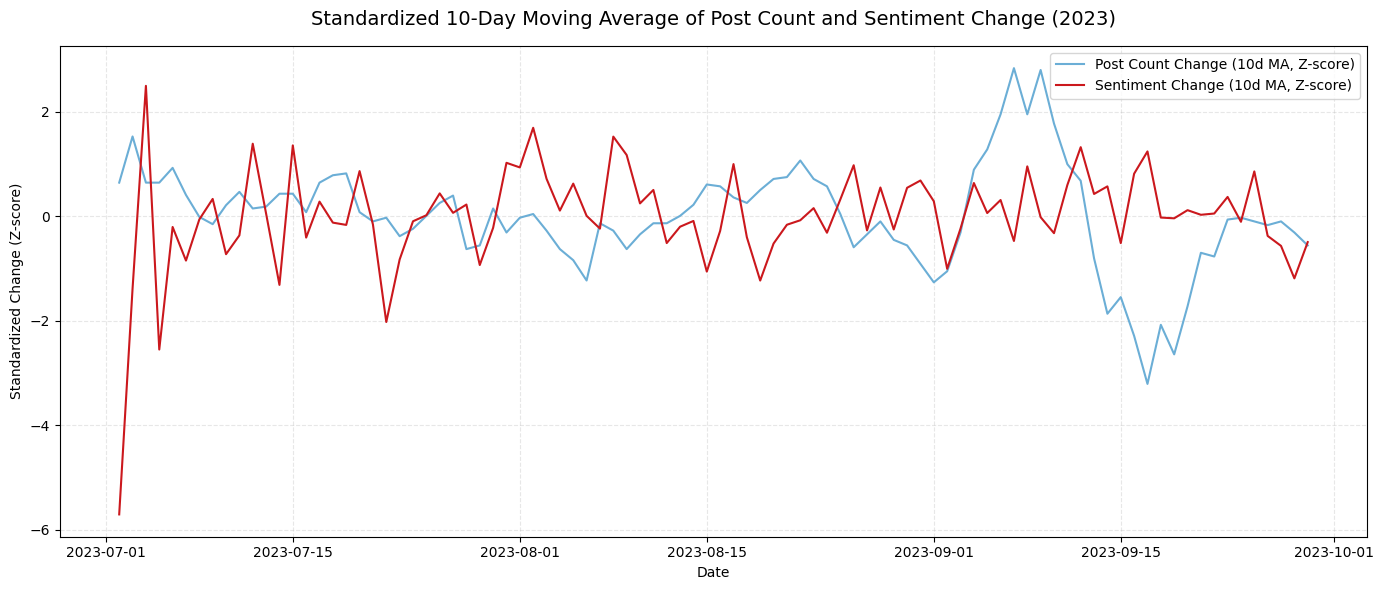

📌 Pearson Correlation (Z-score normalized, 10-day moving average): -0.15
📌 Pearson Correlation (lag +1 day, Z-score normalized, 10-day MA): 0.03

📊 Regression Summary (Z-score normalized):
                                OLS Regression Results                                
Dep. Variable:     avg_sentiment_change_10d_z   R-squared:                       0.023
Model:                                    OLS   Adj. R-squared:                  0.012
Method:                         Least Squares   F-statistic:                     2.098
Date:                        Sun, 27 Apr 2025   Prob (F-statistic):              0.151
Time:                                19:07:26   Log-Likelihood:                -126.14
No. Observations:                          90   AIC:                             256.3
Df Residuals:                              88   BIC:                             261.3
Df Model:                                   1                                         
Covariance Type:            

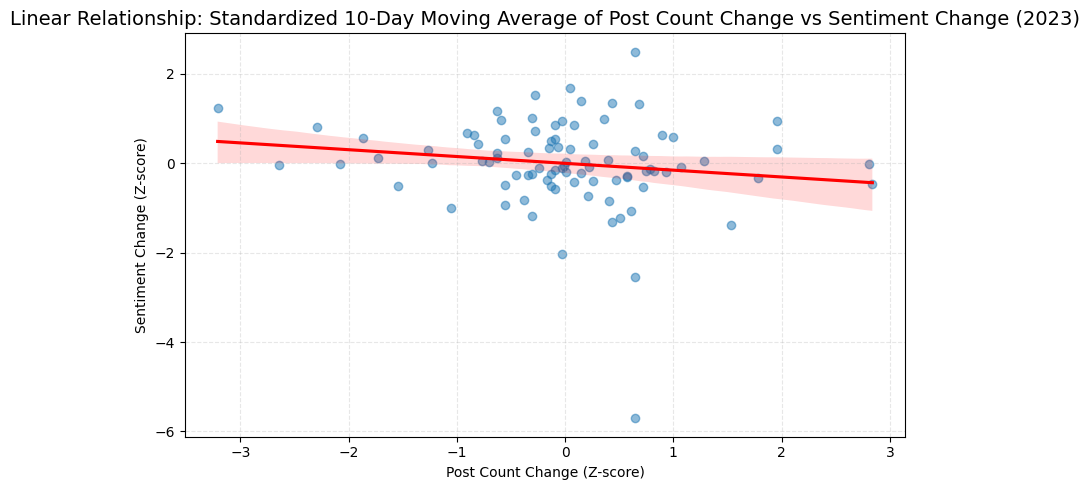

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

merged_df['post_count_change'] = merged_df['post_count'].diff()
merged_df['avg_sentiment_change'] = merged_df['average_sentiment'].diff()
merged_df = merged_df.dropna()

merged_df['post_count_change_10d'] = merged_df['post_count_change'].rolling(window=10, min_periods=1).mean()
merged_df['avg_sentiment_change_10d'] = merged_df['avg_sentiment_change'].rolling(window=10, min_periods=1).mean()

merged_df['post_count_change_10d_z'] = (merged_df['post_count_change_10d'] - merged_df['post_count_change_10d'].mean()) / merged_df['post_count_change_10d'].std()
merged_df['avg_sentiment_change_10d_z'] = (merged_df['avg_sentiment_change_10d'] - merged_df['avg_sentiment_change_10d'].mean()) / merged_df['avg_sentiment_change_10d'].std()

fig, ax = plt.subplots(figsize=(14, 6))
sns.lineplot(data=merged_df, x='date', y='post_count_change_10d_z', label='Post Count Change (10d MA, Z-score)', color='#6baed6')
sns.lineplot(data=merged_df, x='date', y='avg_sentiment_change_10d_z', label='Sentiment Change (10d MA, Z-score)', color='#cb181d')
plt.title('Standardized 10-Day Moving Average of Post Count and Sentiment Change (2023)', fontsize=14, pad=15)
plt.xlabel('Date')
plt.ylabel('Standardized Change (Z-score)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

corr = merged_df['post_count_change_10d_z'].corr(merged_df['avg_sentiment_change_10d_z'])
print(f"📌 Pearson Correlation (Z-score normalized, 10-day moving average): {corr:.2f}")

merged_df['avg_sentiment_change_10d_z_lag1'] = merged_df['avg_sentiment_change_10d_z'].shift(-1)
lag_corr = merged_df[['post_count_change_10d_z', 'avg_sentiment_change_10d_z_lag1']].corr().iloc[0, 1]
print(f"📌 Pearson Correlation (lag +1 day, Z-score normalized, 10-day MA): {lag_corr:.2f}")

X = sm.add_constant(merged_df['post_count_change_10d_z'])
y = merged_df['avg_sentiment_change_10d_z']
model = sm.OLS(y, X).fit()

print("\n📊 Regression Summary (Z-score normalized):")
print(model.summary())

plt.figure(figsize=(8, 5))
sns.regplot(x='post_count_change_10d_z', y='avg_sentiment_change_10d_z', data=merged_df,
            scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Linear Relationship: Standardized 10-Day Moving Average of Post Count Change vs Sentiment Change (2023)', fontsize=14)
plt.xlabel('Post Count Change (Z-score)')
plt.ylabel('Sentiment Change (Z-score)')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import json
from collections import defaultdict
from datetime import datetime

posts_path = '/content/heat_posts2024_standardized.jsonl'
sentiment_path = '/content/2024daily_sentiment.csv'

def load_posts_data(filepath):
    daily_counts = defaultdict(int)
    with open(filepath, 'r', encoding='utf-8') as f:
        for line in f:
            try:
                post = json.loads(line)
                dt = datetime.strptime(post['created_at'], "%Y-%m-%dT%H:%M:%S.%f%z")
                date_str = dt.strftime("%Y-%m-%d")
                daily_counts[date_str] += 1
            except (json.JSONDecodeError, KeyError, ValueError):
                continue
    df_posts = pd.DataFrame.from_dict(daily_counts, orient='index', columns=['post_count'])
    df_posts.index = pd.to_datetime(df_posts.index).tz_localize(None)  # 去除时区信息
    df_posts = df_posts.sort_index()
    return df_posts

def load_sentiment_data(filepath):
    df_sent = pd.read_csv(filepath, parse_dates=['Date'])
    df_sent = df_sent.set_index('Date')
    df_sent = df_sent.rename(columns={'Average_Sentiment': 'average_sentiment'})
    df_sent = df_sent.sort_index()
    return df_sent

df_sent = load_sentiment_data(sentiment_path)

df_posts.index = df_posts.index.tz_localize(None)
df_sent.index = df_sent.index.tz_localize(None)


merged_df = pd.merge(df_posts, df_sent, left_index=True, right_index=True, how='inner')


merged_df = merged_df[merged_df.index.year == 2024]
merged_df = merged_df.reset_index().rename(columns={'index': 'date'})

merged_df.head()


,date,post_count,average_sentiment
0,2024-06-01,26,0.035014
1,2024-06-02,17,0.124977
2,2024-06-03,9,0.238867
3,2024-06-04,13,0.194433
4,2024-06-05,17,0.108766


<ipython-input-10-26124f30dbf9>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['post_count_change_10d'] = merged_df['post_count_change'].rolling(window=10, min_periods=1).mean()
<ipython-input-10-26124f30dbf9>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['avg_sentiment_change_10d'] = merged_df['avg_sentiment_change'].rolling(window=10, min_periods=1).mean()
<ipython-input-10-26124f30dbf9>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

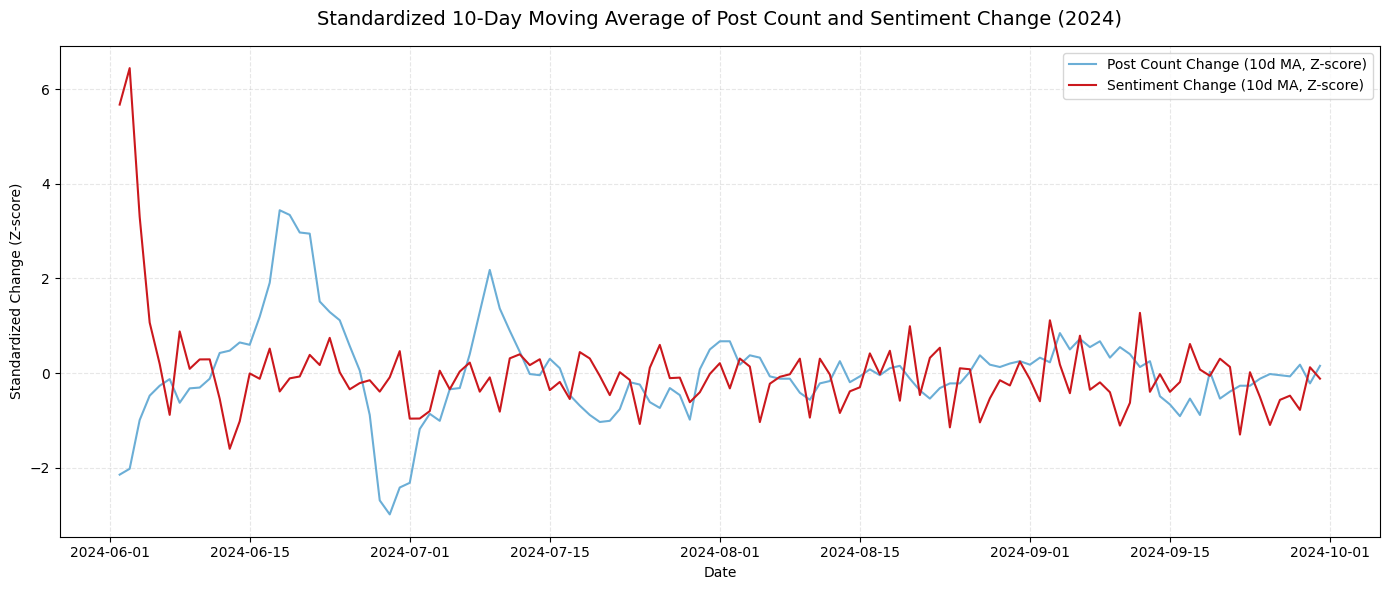

📌 Pearson Correlation (Z-score normalized, 10-day moving average): -0.23
📌 Pearson Correlation (lag +1 day, Z-score normalized, 10-day MA): -0.17

📊 Regression Summary (Z-score normalized):
                                OLS Regression Results                                
Dep. Variable:     avg_sentiment_change_10d_z   R-squared:                       0.054
Model:                                    OLS   Adj. R-squared:                  0.046
Method:                         Least Squares   F-statistic:                     6.739
Date:                        Tue, 29 Apr 2025   Prob (F-statistic):             0.0106
Time:                                18:43:20   Log-Likelihood:                -167.86
No. Observations:                         121   AIC:                             339.7
Df Residuals:                             119   BIC:                             345.3
Df Model:                                   1                                         
Covariance Type:           

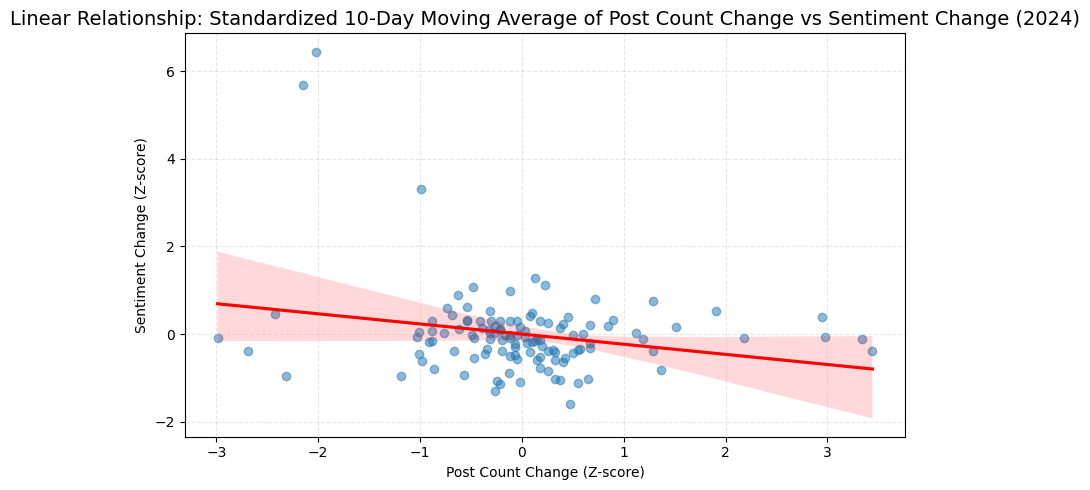

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

merged_df['post_count_change'] = merged_df['post_count'].diff()
merged_df['avg_sentiment_change'] = merged_df['average_sentiment'].diff()
merged_df = merged_df.dropna()


merged_df['post_count_change_10d'] = merged_df['post_count_change'].rolling(window=10, min_periods=1).mean()
merged_df['avg_sentiment_change_10d'] = merged_df['avg_sentiment_change'].rolling(window=10, min_periods=1).mean()

merged_df['post_count_change_10d_z'] = (merged_df['post_count_change_10d'] - merged_df['post_count_change_10d'].mean()) / merged_df['post_count_change_10d'].std()
merged_df['avg_sentiment_change_10d_z'] = (merged_df['avg_sentiment_change_10d'] - merged_df['avg_sentiment_change_10d'].mean()) / merged_df['avg_sentiment_change_10d'].std()


fig, ax = plt.subplots(figsize=(14, 6))
sns.lineplot(data=merged_df, x='date', y='post_count_change_10d_z', label='Post Count Change (10d MA, Z-score)', color='#6baed6')
sns.lineplot(data=merged_df, x='date', y='avg_sentiment_change_10d_z', label='Sentiment Change (10d MA, Z-score)', color='#cb181d')
plt.title('Standardized 10-Day Moving Average of Post Count and Sentiment Change (2024)', fontsize=14, pad=15)
plt.xlabel('Date')
plt.ylabel('Standardized Change (Z-score)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


corr = merged_df['post_count_change_10d_z'].corr(merged_df['avg_sentiment_change_10d_z'])
print(f"📌 Pearson Correlation (Z-score normalized, 10-day moving average): {corr:.2f}")

merged_df['avg_sentiment_change_10d_z_lag1'] = merged_df['avg_sentiment_change_10d_z'].shift(-1)
lag_corr = merged_df[['post_count_change_10d_z', 'avg_sentiment_change_10d_z_lag1']].corr().iloc[0, 1]
print(f"📌 Pearson Correlation (lag +1 day, Z-score normalized, 10-day MA): {lag_corr:.2f}")


X = sm.add_constant(merged_df['post_count_change_10d_z'])
y = merged_df['avg_sentiment_change_10d_z']
model = sm.OLS(y, X).fit()

print("\n📊 Regression Summary (Z-score normalized):")
print(model.summary())


plt.figure(figsize=(8, 5))
sns.regplot(x='post_count_change_10d_z', y='avg_sentiment_change_10d_z', data=merged_df,
            scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Linear Relationship: Standardized 10-Day Moving Average of Post Count Change vs Sentiment Change (2024)', fontsize=14)
plt.xlabel('Post Count Change (Z-score)')
plt.ylabel('Sentiment Change (Z-score)')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score

# 1. Load & prepare
posts_df = pd.read_json('/content/drive/MyDrive/heat_posts2023.jsonl', lines=True)
posts_df['date'] = pd.to_datetime(posts_df['created_at']).dt.date
posts_daily = posts_df.groupby('date').size().reset_index(name='post_count')
posts_daily['date'] = pd.to_datetime(posts_daily['date'])

sentiment = pd.read_csv('/content/drive/MyDrive/API temp data/05 统计学/2023daily_sentiment.csv')
sentiment['date'] = pd.to_datetime(sentiment['Date']).dt.tz_localize(None)
sentiment['average_sentiment'] = pd.to_numeric(sentiment['Average_Sentiment'], errors='coerce')

# 2. Merge & compute changes
df = pd.merge(posts_daily, sentiment[['date','average_sentiment']], on='date', how='inner').dropna()
df['post_count_change']        = df['post_count'].diff()
df['sentiment_change']         = df['average_sentiment'].diff()

# 3. Build lagged predictor: use lag-1 of post_count_change
df['post_count_change_lag1']   = df['post_count_change'].shift(1)
df = df.dropna().reset_index(drop=True)

# 4. Train/test split (e.g. first 70% train, last 30% test)
split = int(len(df)*0.7)
train, test = df.iloc[:split], df.iloc[split:]

# 5. Fit OLS on train: sentiment_change ~ post_count_change_lag1
X_train = sm.add_constant(train['post_count_change_lag1'])
y_train = train['sentiment_change']
model = sm.OLS(y_train, X_train).fit()

# 6. Predict on test
X_test     = sm.add_constant(test['post_count_change_lag1'])
y_test     = test['sentiment_change']
y_pred     = model.predict(X_test)

# 7. Evaluate
mse   = mean_squared_error(y_test, y_pred)
r2    = r2_score(y_test, y_pred)

print("===== Predictive OLS Model =====")
print(model.summary())
print(f"\nTest MSE: {mse:.4f}")
print(f"Test R²:  {r2:.4f}")

# 8. Plot actual vs predicted
plt.figure(figsize=(10,5))
plt.plot(test['date'], y_test, label='Actual ΔSentiment', marker='o')
plt.plot(test['date'], y_pred, label='Predicted ΔSentiment', marker='x')
plt.xticks(rotation=45)
plt.legend()
plt.title("Predicting Sentiment Change from Yesterday's Post Count Change")
plt.ylabel("Δ Sentiment")
plt.xlabel("Date")
plt.tight_layout()
plt.show()
